In [ ]:
!python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
!pip install --upgrade pip setuptools
!pip install simpleaudio
!sudo apt-get install -y python3-dev libasound2-dev

     |████████████████████████████████| 163kB 5.8MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 1.5MB 5.2MB/s 
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.2)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 2.0 MB 6.0 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp36-cp36m-linux_x86_64.whl size=2063911 sha256=f9ac0520b02d27a71f533953f26a905cf829a9a2aac5a467fed35c2193e3bc44
  Stored in directory: /root/.cache/pip/wheels/7a/95/25/ad751324db1984f028b2579415d9f937d65dd654605dc7f037
Successfully built simpleaudio
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
python3-dev is already the newest vers

In [ ]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
import math
import simpleaudio as sa
from scipy.io.wavfile import write
from IPython.display import Audio


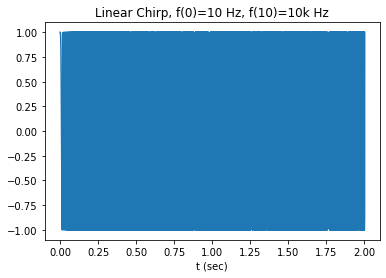

In [ ]:

T = 2
fs = 44100
t = np.linspace(0, T, fs * T)
w = chirp(t, f0=1, f1=10000, t1=T, method='linear', phi = math.pi/2)
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=10 Hz, f(10)=10k Hz")
plt.xlabel('t (sec)')
plt.show()


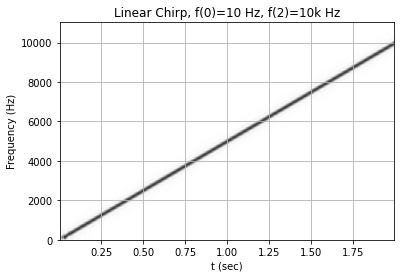

In [ ]:

def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

plot_spectrogram(f'Linear Chirp, f(0)=10 Hz, f({T})=10k Hz', w, fs)
plt.show()

In [ ]:
#scaled = np.int16(w/np.max(np.abs(w)) * 32767)
# Ensure that highest value is in 16-bit range
audio = w * (2**15 - 1) / np.max(np.abs(w))
# Convert to 16-bit data
audio = audio.astype(np.int16)
write('test.wav', 44100, audio)

# Start playback
#play_obj = sa.play_buffer(audio, 1, 2, 44100)

# Wait for playback to finish before exiting
#play_obj.wait_done()
Audio(audio,rate=fs)
